In [1]:
!unzip /content/Fake.csv.zip
!unzip /content/True.csv.zip

!python -m spacy download en_core_web_lg

Archive:  /content/Fake.csv.zip
  inflating: Fake.csv                
Archive:  /content/True.csv.zip
  inflating: True.csv                
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Importing Libraries**

In [2]:
import re
import nltk
import spacy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('punkt_tab')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

ps = PorterStemmer()
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Loading The Dataset**

In [3]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

true['fake'] = 0
fake['fake'] = 1

df = pd.concat([true, fake], ignore_index=True)

del true
del fake

df = df.drop(columns = ['date','subject','text'])
df = df.sample(frac = 1)

df.head()

titles = np.array(df['title'])

In [4]:
df.head(10)

,title,fake
14463,"Crowds boo, jeer as Zimbabwe's Mugabe motorcad...",0
27095,Trump Said ‘Ask The Family’ Of A Benghazi Vic...,1
42588,Serial Plagiarist Does Victory Dance Over Whit...,1
6264,Texas Planned Parenthood asks judge to block M...,0
10280,Obama did not indicate preference for Democrat...,0
14408,Satellite calls yield no clues on missing Arge...,0
24775,BUSTED: Trump’s Secretary Of State Pick Is A ...,1
36101,OBAMA STARES DOWN AMERICAN SNIPER Widow Taya K...,1
3085,"Russians targeted 21 election systems, U.S. of...",0
40033,BOOM! PRES TRUMP Rips Media And Critics: “I wa...,1


In [5]:
len(df)

44898

Data Preprocessing

In [6]:
corpus = []

for i in tqdm(range(len(titles))):
  news = re.sub(r'^a-zA-Z', '', titles[i])
  news = word_tokenize(news.lower())
  news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
  news = nlp(news).vector
  corpus.append(news)

X = np.array(corpus)

X_train = X[:40000]
y_train = df['fake'][:40000]
X_test  = X[40000:]
y_test  = df['fake'][40000:]

100%|██████████| 44898/44898 [08:44<00:00, 85.58it/s]


**Training The Classifier**

In [7]:
classifier = LogisticRegression(random_state = 42, max_iter = 50)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=50, random_state=42)

**Model Evaluation**

[[2201  134]
 [ 212 2351]]
Accuracy :  92.94


<Axes: >

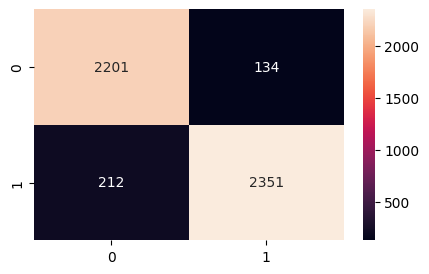

In [8]:

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy : ' , round(accuracy_score(y_test,y_pred)*100,2))

plt.figure(figsize = (5,3))
sns.heatmap(cm, annot = True, fmt = 'd')